## General

In [3]:
# evaluate all lines in cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime
# TODAY = datetime.datetime.today()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special,optimize

In [5]:
zs = np.linspace(0.0,2.5,100)
zs

array([0.        , 0.02525253, 0.05050505, 0.07575758, 0.1010101 ,
       0.12626263, 0.15151515, 0.17676768, 0.2020202 , 0.22727273,
       0.25252525, 0.27777778, 0.3030303 , 0.32828283, 0.35353535,
       0.37878788, 0.4040404 , 0.42929293, 0.45454545, 0.47979798,
       0.50505051, 0.53030303, 0.55555556, 0.58080808, 0.60606061,
       0.63131313, 0.65656566, 0.68181818, 0.70707071, 0.73232323,
       0.75757576, 0.78282828, 0.80808081, 0.83333333, 0.85858586,
       0.88383838, 0.90909091, 0.93434343, 0.95959596, 0.98484848,
       1.01010101, 1.03535354, 1.06060606, 1.08585859, 1.11111111,
       1.13636364, 1.16161616, 1.18686869, 1.21212121, 1.23737374,
       1.26262626, 1.28787879, 1.31313131, 1.33838384, 1.36363636,
       1.38888889, 1.41414141, 1.43939394, 1.46464646, 1.48989899,
       1.51515152, 1.54040404, 1.56565657, 1.59090909, 1.61616162,
       1.64141414, 1.66666667, 1.69191919, 1.71717172, 1.74242424,
       1.76767677, 1.79292929, 1.81818182, 1.84343434, 1.86868

In [7]:
def ΗfunctionLCDM(z,y):
    omegam = y[0]
    h = y[1]
    E = (omegam*((1+z)**3)+(1-omegam))**0.5
    return 100*h*E

In [8]:
ΗfunctionLCDM(zs,[0.3,0.7])

array([ 70.        ,  70.81101271,  71.65309135,  72.52613299,
        73.43000035,  74.36452438,  75.32950685,  76.32472293,
        77.34992373,  78.40483879,  79.48917847,  80.60263631,
        81.74489116,  82.91560939,  84.11444678,  85.34105047,
        86.59506062,  87.87611207,  89.18383583,  90.51786044,
        91.8778132 ,  93.26332132,  94.67401293,  96.10951801,
        97.56946919,  99.05350249, 100.5612579 , 102.09238001,
       103.64651845, 105.22332825, 106.82247027, 108.4436114 ,
       110.08642487, 111.75059035, 113.43579416, 115.1417293 ,
       116.86809558, 118.61459963, 120.38095488, 122.16688157,
       123.97210671, 125.79636399, 127.63939377, 129.50094292,
       131.38076476, 133.27861895, 135.19427137, 137.12749396,
       139.07806467, 141.04576724, 143.03039112, 145.0317313 ,
       147.0495882 , 149.0837675 , 151.13408002, 153.20034155,
       155.28237275, 157.37999899, 159.49305023, 161.62136084,
       163.76476954, 165.92311921, 168.09625679, 170.28

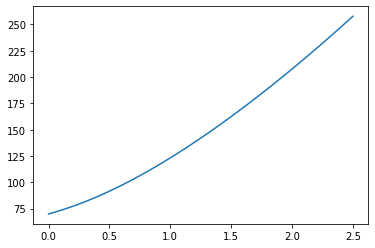

In [6]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))

In [9]:
def Ηfunction(z,y,equationE):
    '''
    f(Q) = Qexp(lmbd*Q_0/Q)
    '''
    global  Om_m0, a, h
    a = y[2]
    Om_m0 = y[0]
    h = y[1]
    T_cmb = 2.7255
    Omr = Om_m0/(1. + 2.5e4 * Om_m0 * h**2. * (T_cmb/2.7)**(-4.))
    expr = (Om_m0 + Omr)/(-2*np.exp(0.5))
    H_0 = 100*h
    T_cmb = 2.7255
    Om_r = Om_m0/(1. + 2.5e4 * Om_m0* h**2. * (T_cmb/2.7)**(-4.))
    Og_mod = 31500. * (T_cmb/2.7)**(-4.)
    Om_l = 1. - Om_m0- Om_r
    x0E = (Om_m0*(1.+z)**3. + Om_r*(1.+ z)**4. + Om_l)**0.5
    res = optimize.newton(equationE, x0E, args = (z,)) 
    return H_0*res

array([0.7       , 0.68405734, 0.66807352, 0.6520863 , 0.63613173,
       0.62024391, 0.60445486, 0.58879437, 0.57328997, 0.55796684,
       0.54284783, 0.52795344, 0.51330191, 0.49890922, 0.4847892 ,
       0.47095363, 0.45741234, 0.4441733 , 0.43124277, 0.41862538,
       0.40632432, 0.39434139, 0.38267717, 0.3713311 , 0.36030164,
       0.34958633, 0.33918194, 0.32908453, 0.31928953, 0.30979189,
       0.3005861 , 0.29166625, 0.28302616, 0.2746594 , 0.26655933,
       0.25871918, 0.25113208, 0.24379109, 0.23668926, 0.22981964,
       0.22317532, 0.21674942, 0.21053517, 0.20452587, 0.19871495,
       0.19309594, 0.18766252, 0.18240849, 0.17732781, 0.17241459,
       0.16766309, 0.16306774, 0.15862312, 0.15432398, 0.1501652 ,
       0.14614187, 0.14224919, 0.13848255, 0.13483747, 0.13130964,
       0.12789488, 0.12458918, 0.12138864, 0.11828952, 0.11528821,
       0.11238123, 0.10956522, 0.10683695, 0.10419331, 0.1016313 ,
       0.09914803, 0.09674074, 0.09440673, 0.09214344, 0.08994

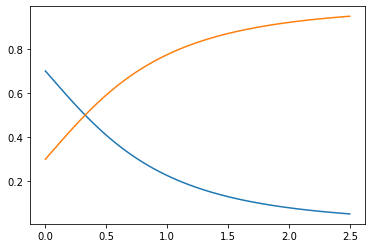

In [10]:
# fish plot for LCDM 
# \Omega_{\Lambda} = E**2 -Omega_{m0} (1+z)**3
omegam = 0.3
h = 0.9
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/ΗfunctionLCDM(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((ΗfunctionLCDM(zs,[omegam,h])/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right disaccelerated 

# Model 1

In [9]:
equation_E1 = lambda E,z: E**2 + E**(2*a)*(-1 + (Om_m0)) - (1 + z)**3*(Om_m0)

In [10]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E1))

70.0


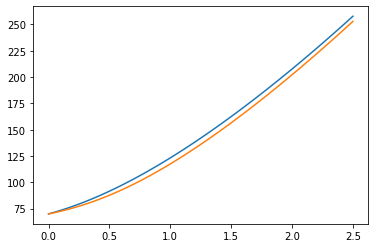

In [11]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,-0.5],equation_E1))

array([0.7       , 0.68281644, 0.66548058, 0.64803722, 0.63053068,
       0.61300437, 0.5955005 , 0.57805978, 0.56072113, 0.54352144,
       0.52649539, 0.50967527, 0.49309086, 0.47676937, 0.46073533,
       0.44501063, 0.42961452, 0.41456361, 0.39987201, 0.38555134,
       0.37161091, 0.35805778, 0.34489695, 0.33213146, 0.31976254,
       0.30778979, 0.29621131, 0.28502383, 0.27422292, 0.26380305,
       0.25375778, 0.24407988, 0.23476143, 0.22579397, 0.21716854,
       0.20887585, 0.20090633, 0.1932502 , 0.18589756, 0.17883845,
       0.17206289, 0.16556097, 0.15932284, 0.15333878, 0.14759924,
       0.14209483, 0.13681638, 0.13175493, 0.12690177, 0.12224841,
       0.11778666, 0.11350855, 0.1094064 , 0.10547278, 0.10170055,
       0.0980828 , 0.09461292, 0.09128452, 0.0880915 , 0.08502797,
       0.08208832, 0.07926715, 0.07655929, 0.0739598 , 0.07146395,
       0.06906721, 0.06676526, 0.06455396, 0.06242937, 0.06038772,
       0.05842539, 0.05653896, 0.05472513, 0.05298078, 0.05130

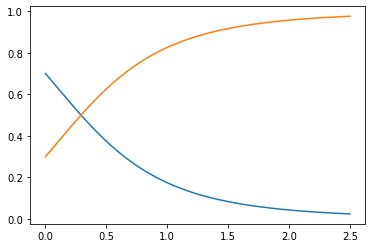

In [12]:
omegam = 0.3
h = 0.6
a = -0.3
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,a],equation_E1))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,a],equation_E1)/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right 

# Model 2

In [100]:
def Ηfunctionexp1(z,y):
    '''
    f(Q) = Qexp(lmbd*Q_0/Q)
    '''
    Om_m0 = y[0]
    h = y[1]
    T_cmb = 2.7255
    Omr = Om_m0/(1. + 2.5e4 * Om_m0 * h**2. * (T_cmb/2.7)**(-4.))
    expr = (Om_m0 + Omr)/(-2*np.exp(0.5))
    a = (0.5 + special.lambertw(expr,k=0)).real
    H_0 = 100*h
    T_cmb = 2.7255
    Om_r = Om_m0/(1. + 2.5e4 * Om_m0* h**2. * (T_cmb/2.7)**(-4.))
    Og_mod = 31500. * (T_cmb/2.7)**(-4.)
    Om_l = 1. - Om_m0- Om_r
    x0E = (Om_m0*(1.+z)**3. + Om_r*(1.+z)**4. + Om_l)**0.5
    equation_E = lambda E: (E**2.- 2*a)* np.exp(a*1./E**2)- Om_m0*(1.+z)**3- Om_r*(1.+z)**4
    res = optimize.newton(equation_E, x0E) 
    return H_0*res

In [101]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunctionexp1(0,[0.3,0.7]))

70.0


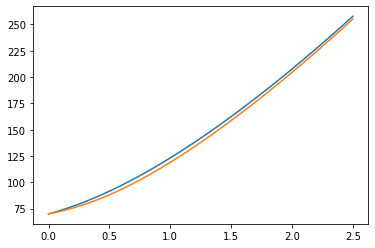

In [102]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunctionexp1(zs,[0.3,0.7]))

array([0.7       , 0.68405734, 0.66807352, 0.6520863 , 0.63613173,
       0.62024391, 0.60445486, 0.58879437, 0.57328997, 0.55796684,
       0.54284783, 0.52795344, 0.51330191, 0.49890922, 0.4847892 ,
       0.47095363, 0.45741234, 0.4441733 , 0.43124277, 0.41862538,
       0.40632432, 0.39434139, 0.38267717, 0.3713311 , 0.36030164,
       0.34958633, 0.33918194, 0.32908453, 0.31928953, 0.30979189,
       0.3005861 , 0.29166625, 0.28302616, 0.2746594 , 0.26655933,
       0.25871918, 0.25113208, 0.24379109, 0.23668926, 0.22981964,
       0.22317532, 0.21674942, 0.21053517, 0.20452587, 0.19871495,
       0.19309594, 0.18766252, 0.18240849, 0.17732781, 0.17241459,
       0.16766309, 0.16306774, 0.15862312, 0.15432398, 0.1501652 ,
       0.14614187, 0.14224919, 0.13848255, 0.13483747, 0.13130964,
       0.12789488, 0.12458918, 0.12138864, 0.11828952, 0.11528821,
       0.11238123, 0.10956522, 0.10683695, 0.10419331, 0.1016313 ,
       0.09914803, 0.09674074, 0.09440673, 0.09214344, 0.08994

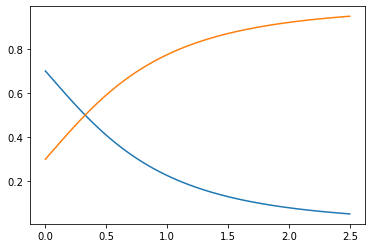

In [103]:
# fish plot for LCDM 
# \Omega_{\Lambda} = E**2 -Omega_{m0} (1+z)**3
omegam = 0.3
h = 0.6
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/ΗfunctionLCDM(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((ΗfunctionLCDM(zs,[omegam,h])/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right disaccelerated 

array([0.7       , 0.6821295 , 0.66405735, 0.64583617, 0.62751906,
       0.60915905, 0.59080853, 0.57251874, 0.55433924, 0.53631745,
       0.5184982 , 0.50092336, 0.48363152, 0.46665774, 0.45003338,
       0.43378596, 0.41793914, 0.40251275, 0.38752285, 0.37298187,
       0.3588988 , 0.34527939, 0.33212641, 0.31943988, 0.30721739,
       0.29545431, 0.28414412, 0.27327866, 0.26284837, 0.25284256,
       0.24324958, 0.23405709, 0.22525219, 0.21682162, 0.20875188,
       0.20102937, 0.1936405 , 0.1865718 , 0.17980995, 0.1733419 ,
       0.16715487, 0.16123645, 0.15557457, 0.15015759, 0.14497425,
       0.14001372, 0.13526561, 0.13071995, 0.12636719, 0.12219821,
       0.1182043 , 0.11437714, 0.11070882, 0.1071918 , 0.1038189 ,
       0.10058329, 0.09747849, 0.09449834, 0.09163698, 0.08888884,
       0.08624865, 0.08371141, 0.08127234, 0.07892694, 0.07667092,
       0.07450021, 0.07241096, 0.07039949, 0.06846234, 0.06659618,
       0.0647979 , 0.06306451, 0.06139317, 0.05978121, 0.05822

Text(0.5, 0, '$z$')

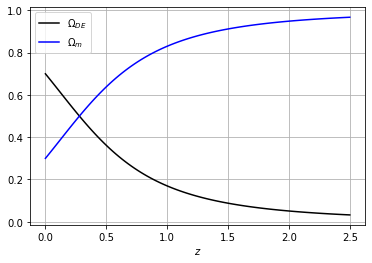

In [104]:
# fish plot for exp1
omegam = 0.3
h = 0.7
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunctionexp1(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,omegam,h),label='$\Omega_{DE}$',color='black')
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunctionexp1(zs,[omegam,h])/(100*h))**2),label='$\Omega_{m}$',color='blue')
plt.xlabel('$z$')
plt.grid()
plt.legend()
plt.savefig('')
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 3

In [105]:
equation_E3 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - E**2*(1 + np.exp(1)**((E**2*(-1 + 2*special.lambertw((np.sqrt(np.exp(1))*(Om_m0))/2).real))/2)*(-1 + E**2 - 2*E**2*special.lambertw((np.sqrt(np.exp(1))*(Om_m0))/2).real))

In [106]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E3))

70.0


/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:445: RuntimeWarning: RMS of 124.862 reached
  warnings.warn(


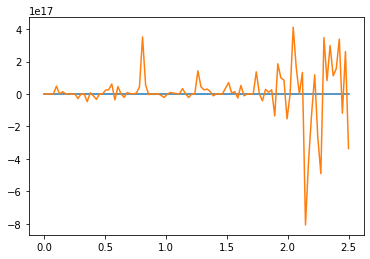

In [107]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,-0.5],equation_E3))

/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:445: RuntimeWarning: RMS of 152.282 reached
  warnings.warn(


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.9998484 , 0.99994663, 0.99999962,
       0.99985173, 1.        , 1.        , 1.        , 0.94019419,
       0.92892854, 0.91592556, 0.90087163, 0.88334774, 0.86276872,
       0.83826756, 0.80844796, 0.77075256, 0.71928051, 0.62840636,
       0.99929357, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.9999492 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99987109, 1.        , 1.        , 1.        ,
       0.99988676, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:445: RuntimeWarning: RMS of 152.282 reached
  warnings.warn(


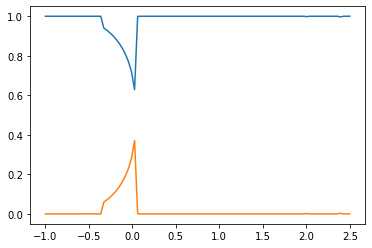

In [77]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,1,-0.5],equation_E3))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,-0.5],equation_E3)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 4

In [11]:
equation_E4 = lambda E,z: E**2 - (100**(2.7755575615628914*(10**-17)*np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))*
    h**(np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*(-0.18201499873448362 + 
       0.6065306597126335*(Om_m0)))*
    (h*E)**(2*a + np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*
       (0.18201499873448365 - 0.6065306597126335*(Om_m0)))*
    (np.exp(1)**(((-1 + E**2)*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      (-0.3000919999999996 + 0.9999999999999998*E**2) + 
     np.exp(1)**((E**2*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      (0.9999999999999998 - 1.9999999999999996*a - 0.9999999999999998*E**2 + 
       1.9999999999999996*a*E**2)) + 
   (100**(2.7755575615628914*(10**-17)*np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))*
      np.exp(1)**(((-1 + E**2)*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      h**(np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*(-0.18201499873448362 + 
         0.6065306597126335*(Om_m0)))*
      (h*E)**(2*a + np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*
         (0.18201499873448365 - 0.6065306597126335*(Om_m0)))*(0.9999999999999998 - 
       0.9999999999999998*E**2) + 1.*h**(2*a)*(1. + 1.*z)**3)*(Om_m0))/h**(2*a)
# fix friedmann

In [12]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E4))

69.99932012446848


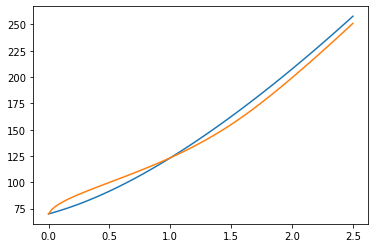

In [13]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,1],equation_E4))

array([0.69995839, 0.68759196, 0.67540178, 0.66340118, 0.65160086,
       0.64000905, 0.62863173, 0.61747288, 0.60653468, 0.59581768,
       0.58532105, 0.57504274, 0.56497966, 0.55512786, 0.54548264,
       0.53603872, 0.52679034, 0.51773139, 0.50885551, 0.50015614,
       0.49162664, 0.48326033, 0.47505057, 0.46699077, 0.45907449,
       0.45129541, 0.44364741, 0.43612457, 0.42872118, 0.42143177,
       0.41425113, 0.40717428, 0.40019652, 0.39331339, 0.3865207 ,
       0.37981451, 0.37319114, 0.36664713, 0.3601793 , 0.35378469,
       0.34746054, 0.34120434, 0.33501379, 0.32888678, 0.32282139,
       0.31681589, 0.31086873, 0.30497852, 0.29914403, 0.29336417,
       0.28763802, 0.28196475, 0.27634369, 0.27077428, 0.26525606,
       0.25978868, 0.25437189, 0.24900553, 0.24368951, 0.23842383,
       0.23320856, 0.22804384, 0.22292986, 0.21786688, 0.2128552 ,
       0.20789517, 0.20298719, 0.19813168, 0.19332911, 0.18857997,
       0.18388479, 0.1792441 , 0.17465848, 0.17012849, 0.16565

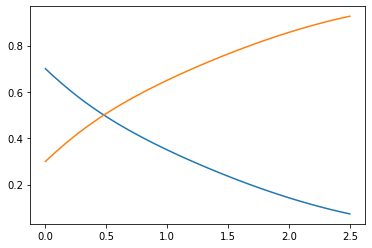

In [14]:
# fish plot for Ηfunction
n = 0.25
h = 0.68
omegam = 0.3
def omegalamda(zs,omegam,h):
      return 1 - (((100*h)/Ηfunction(zs,[omegam,h,n],equation_E4))**2)*omegam*((1+zs)**3)
omegalamda(zs,omegam,h)
plt.plot(zs,omegalamda(zs,omegam,h))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,n],equation_E4)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

In [15]:
def omegalamda(n, zs = zs,omegam = 0.3,h = 0.68):
      return 1 - (((100*h)/Ηfunction(zs,[omegam,h,n],equation_E4))**2)*omegam*((1+zs)**3)
ns = np.linspace(-10.0,10.0,1000)
nvalid = []
for n in ns:
    if 0<=omegalamda(n).all()<=1 and np.isnan(omegalamda(n)).all() == False and np.isfinite(omegalamda(n)).all() == True:
        nvalid.append(n)
print(nvalid)

C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)
C:\Users\VIKTOR~1\AppData\Local\Temp/ipykernel_6132/2047795963.py:4: RuntimeWarning: invalid value encountered in power
  (h*E)**(2*a + np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*
C:\Users\VIKTOR~1\AppData\Local\Temp/ipykernel_6132/2047795963.py:15: RuntimeWarning: invalid value encountered in power
  (h*E)**(2*a + np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*


[-10.0, -9.97997997997998, -9.95995995995996, -9.93993993993994, -9.91991991991992, -9.8998998998999, -9.87987987987988, -9.85985985985986, -9.83983983983984, -9.81981981981982, -9.7997997997998, -9.77977977977978, -9.75975975975976, -9.73973973973974, -9.71971971971972, -9.6996996996997, -9.67967967967968, -9.65965965965966, -9.63963963963964, -9.61961961961962, -9.5995995995996, -9.57957957957958, -9.55955955955956, -9.53953953953954, -9.51951951951952, -9.4994994994995, -9.47947947947948, -9.45945945945946, -9.43943943943944, -9.41941941941942, -9.3993993993994, -9.37937937937938, -9.35935935935936, -9.33933933933934, -9.31931931931932, -9.2992992992993, -9.27927927927928, -9.25925925925926, -9.23923923923924, -9.21921921921922, -9.1991991991992, -9.17917917917918, -9.15915915915916, -9.13913913913914, -9.11911911911912, -9.0990990990991, -9.07907907907908, -9.05905905905906, -9.03903903903904, -9.01901901901902, -8.998998998999, -8.97897897897898, -8.95895895895896, -8.938938938938

# Model 5

In [82]:
equation_E5 = lambda E,z: -E + E**2 - (-E + (1 + z)**3)*(Om_m0)

In [83]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E5))

70.0


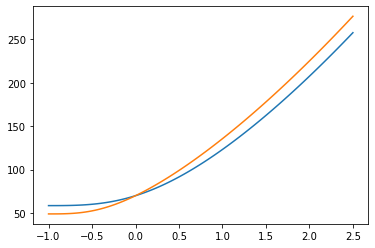

In [84]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,1],equation_E5))

array([1.        , 0.99997295, 0.99978367, 0.99927062, 0.99827454,
       0.99664099, 0.99422375, 0.99088896, 0.98651953, 0.98101955,
       0.97431821, 0.96637277, 0.95717022, 0.94672742, 0.9350896 ,
       0.92232742, 0.90853289, 0.89381449, 0.87829201, 0.86209145,
       0.84534038, 0.82816396, 0.81068173, 0.79300524, 0.77523647,
       0.75746688, 0.73977709, 0.72223697, 0.70490605, 0.68783423,
       0.67106248, 0.65462381, 0.63854405, 0.62284279, 0.60753415,
       0.5926276 , 0.57812858, 0.56403919, 0.5503587 , 0.53708409,
       0.52421039, 0.51173116, 0.49963869, 0.48792437, 0.47657884,
       0.46559225, 0.45495436, 0.44465471, 0.43468275, 0.42502787,
       0.41567956, 0.40662738, 0.39786109, 0.38937062, 0.38114616,
       0.37317812, 0.36545722, 0.35797444, 0.35072104, 0.34368858,
       0.33686893, 0.33025422, 0.3238369 , 0.31760969, 0.31156558,
       0.30569783, 0.3       , 0.29446586, 0.28908945, 0.28386506,
       0.27878718, 0.27385055, 0.26905012, 0.26438104, 0.25983

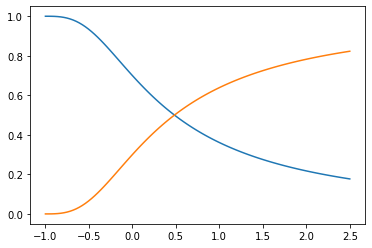

In [85]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,2],equation_E5))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,1],equation_E5)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 6

In [86]:
equation_E6 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - (E**(-2 + 2*a)*(-1 + (Om_m0))*(-2*(1/(np.cosh(E**(-2))))**2 + (-1 + 2*a)*E**2*np.tanh(E**(-2))))/(2*(1/(np.cosh(1)))**2 + np.tanh(1) - 2*a*np.tanh(1))

In [87]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E6))

70.0


/tmp/ipykernel_9774/3068505768.py:1: RuntimeWarning: overflow encountered in cosh
  equation_E6 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - (E**(-2 + 2*a)*(-1 + (Om_m0))*(-2*(1/(np.cosh(E**(-2))))**2 + (-1 + 2*a)*E**2*np.tanh(E**(-2))))/(2*(1/(np.cosh(1)))**2 + np.tanh(1) - 2*a*np.tanh(1))


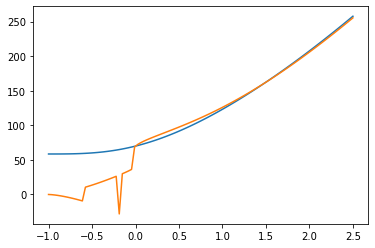

In [88]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,0.5],equation_E6))

/tmp/ipykernel_9774/3068505768.py:1: RuntimeWarning: invalid value encountered in power
  equation_E6 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - (E**(-2 + 2*a)*(-1 + (Om_m0))*(-2*(1/(np.cosh(E**(-2))))**2 + (-1 + 2*a)*E**2*np.tanh(E**(-2))))/(2*(1/(np.cosh(1)))**2 + np.tanh(1) - 2*a*np.tanh(1))
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:426: RuntimeWarning: invalid value encountered in greater_equal
  failures[nz_der] = np.abs(dp) >= tol  # not yet converged


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.12414633, 0.15026394, 0.18131249,        nan,
              nan, 0.32847005,        nan, 0.74616019, 0.74896112,
       0.74152438, 0.73056667, 0.71783146, 0.70406254, 0.68966577,
       0.67490101, 0.65995425, 0.64496933, 0.63006333, 0.61533455,
       0.60086677, 0.58673164, 0.57299004, 0.55969278, 0.54688123,
       0.53458761, 0.52283553, 0.51164037, 0.50100989, 0.4909449 ,
       0.48143996, 0.47248421, 0.46406224, 0.45615488, 0.44874008,
       0.44179365, 0.43529003, 0.42920288, 0.42350563, 0.41817198,
       0.41317622, 0.40849354, 0.40410025, 0.39997392, 0.39609345,
       0.39243913, 0.38899265, 0.38573707, 0.3826568 , 0.3797375 ,
       0.37696604, 0.37433041, 0.37181966, 0.36942381, 0.36713378,
       0.3649413 , 0.36283885, 0.3608196 , 0.35887734, 0.35700

/tmp/ipykernel_9774/3068505768.py:1: RuntimeWarning: invalid value encountered in power
  equation_E6 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - (E**(-2 + 2*a)*(-1 + (Om_m0))*(-2*(1/(np.cosh(E**(-2))))**2 + (-1 + 2*a)*E**2*np.tanh(E**(-2))))/(2*(1/(np.cosh(1)))**2 + np.tanh(1) - 2*a*np.tanh(1))
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:426: RuntimeWarning: invalid value encountered in greater_equal
  failures[nz_der] = np.abs(dp) >= tol  # not yet converged


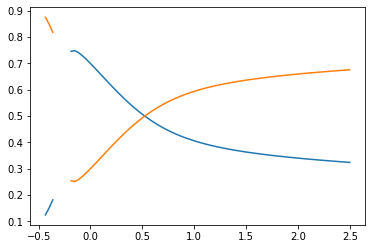

In [89]:
# fish plot for Ηfunction
a = 1.9
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,a],equation_E6))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,a],equation_E6)/(100*h))**2),label='')
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 7

In [37]:
equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)

In [38]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E7))

70.0


/tmp/ipykernel_9774/2306859768.py:1: RuntimeWarning: overflow encountered in power
  equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:419: RuntimeWarning: invalid value encountered in true_divide
  dp = (q1 * (p1 - p))[nz_der] / (q1 - q0)[nz_der]
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:426: RuntimeWarning: invalid value encountered in greater_equal
  failures[nz_der] = np.abs(dp) >= tol  # not yet converged
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


array([ 7.00000000e-01,  6.65211684e-01,  6.21436635e-01,  5.47966708e-01,
       -1.97392254e+00, -6.59329640e+01,  3.94698840e-01, -9.47150613e+01,
       -2.51620772e+01,  9.12929238e-01,  4.71169474e-01,  4.68616264e-01,
       -2.20574868e+00, -2.12741052e+01,             nan, -5.99491637e+02,
       -1.95225515e+02, -5.33971484e-01,  9.43136900e-01, -1.04111430e+00,
       -3.55817717e+01, -1.40385174e+02, -1.52205833e+01, -1.17569915e+01,
       -1.05702212e+01, -9.27845356e+00, -1.96338114e+00, -1.63280580e+00,
                   nan, -6.23550723e+00,             nan, -2.10177660e+01,
       -8.09405316e+00, -5.10891501e+00,             nan, -2.46832757e+00,
       -3.56601303e+00, -9.10686133e+02,  8.92436319e-01,  7.66965844e-01,
                   nan,  8.13872471e-01,             nan, -3.07529137e+02,
       -3.36731319e+01, -1.00582808e+01, -5.72361171e+00, -5.22086711e+00,
       -2.99330957e+01, -8.63945726e+01, -1.38799836e+01, -7.01550540e+00,
       -1.01437961e+01, -

/tmp/ipykernel_9774/2306859768.py:1: RuntimeWarning: overflow encountered in power
  equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:419: RuntimeWarning: invalid value encountered in true_divide
  dp = (q1 * (p1 - p))[nz_der] / (q1 - q0)[nz_der]
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:426: RuntimeWarning: invalid value encountered in greater_equal
  failures[nz_der] = np.abs(dp) >= tol  # not yet converged
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


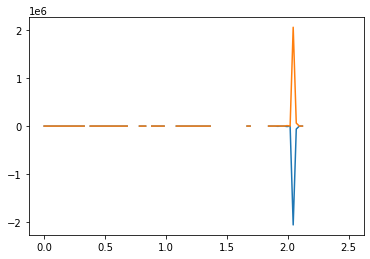

In [39]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,0.5],equation_E7))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,0.5],equation_E7)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 